# Visualisation d'une fonction, ainsi que sa dérivée et sa dérivée seconde.

Après avoir vu comment représenter la dérivée d'une fonction, on va voir que l'on peut continuer à dérivée une fonction, et que l'on peut aussi représenter la dérivée seconde d'une fonction. (en fait il existe aussi la dérivée troisième, quatrième, etc... mais on ne va pas s'en occuper ici)

# 1. Position, Vitesse, et accéleration d'une voiture

![alt text](vitesse_acceleration.PNG "Title")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

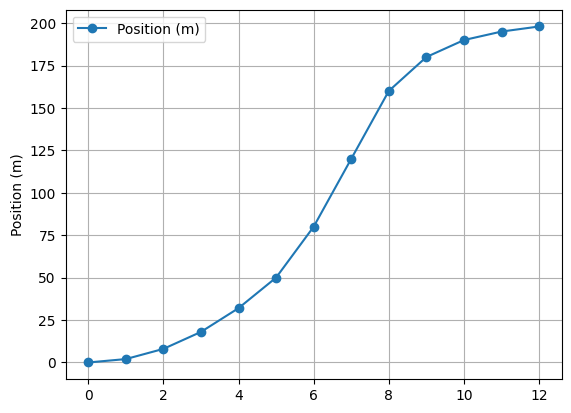

In [13]:
# Données de position en fonction du temps (exemple)
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])  # temps en secondes
x = np.array([0, 2, 8, 18, 32, 50, 80, 120, 160, 180, 190, 195, 198])  # position en mètres

plt.plot(t, x, 'o-', label='Position (m)')
plt.ylabel('Position (m)')
plt.grid()
plt.legend()

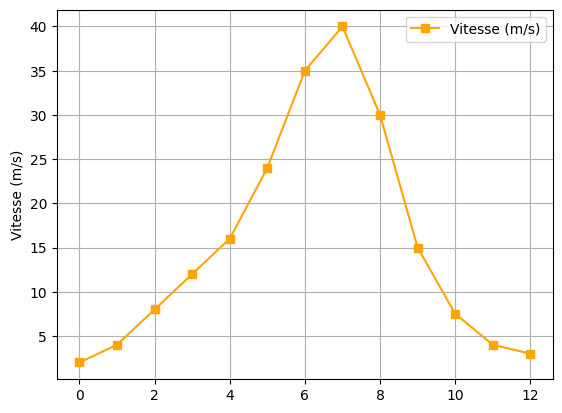

In [14]:
# Calcul de la vitesse (dx/dt)
vitesse = np.gradient(x, t)


plt.plot(t, vitesse, 's-', color='orange', label='Vitesse (m/s)')
plt.ylabel('Vitesse (m/s)')
plt.grid()
plt.legend()

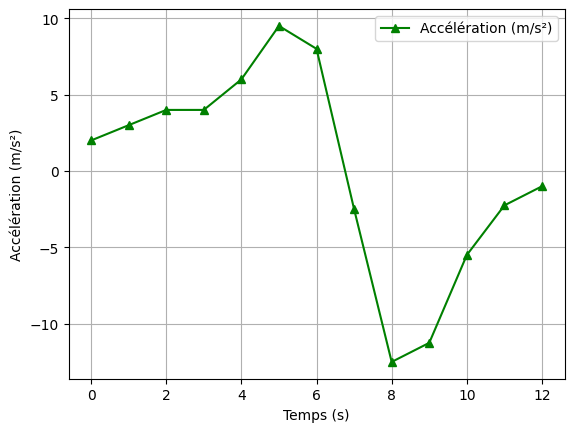

In [9]:
# Calcul de l'accélération (dv/dt)
acceleration = np.gradient(vitesse, t)

plt.plot(t, acceleration, '^-', color='green', label='Accélération (m/s²)')
plt.xlabel('Temps (s)')
plt.ylabel('Accélération (m/s²)')
plt.grid()
plt.legend()

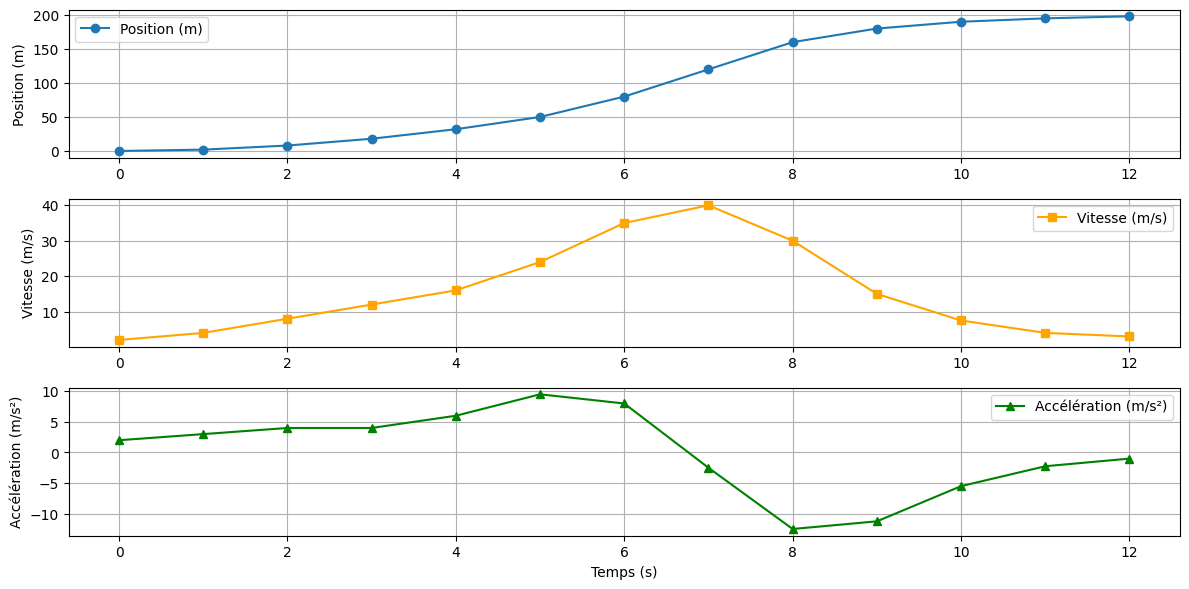

In [15]:
# Affichage des résultats
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, x, 'o-', label='Position (m)')
plt.ylabel('Position (m)')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, vitesse, 's-', color='orange', label='Vitesse (m/s)')
plt.ylabel('Vitesse (m/s)')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, acceleration, '^-', color='green', label='Accélération (m/s²)')
plt.xlabel('Temps (s)')
plt.ylabel('Accélération (m/s²)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## Généralisation : Calcul d'une dérivée seconde a l'aide de Numpy et Sympy

ici on va prendre pour exemple la fonction $f(x) = x^3 - 3x^2 + 2x$ et on va représenter cette fonction, ainsi que sa dérivée et sa dérivée seconde. On va comme précédemment utiliser successivement Numpy puis Sympy pour calculer tout ça. (Scipy ne gère que la dérivée première facilement)

In [4]:
# Définition de la fonction et de ses dérivées (de manière analytique)
def f(x):
    return x**3 - 3*x**2 + 2*x

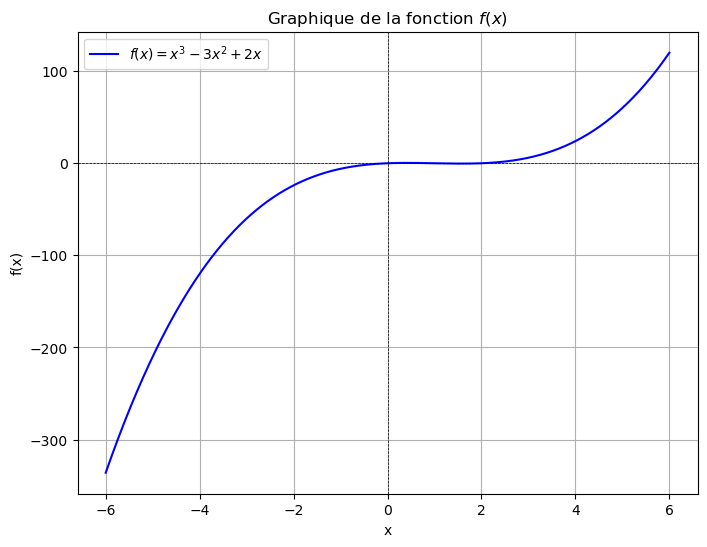

In [25]:
# Création des points x pour le graphique
x = np.linspace(-6, 6, 1000)
y = f(x)

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label=r'$f(x) = x^3 - 3x^2 + 2x$', color='blue')
ax.axhline(0, color='black', lw=0.5, ls='--')
ax.axvline(0, color='black', lw=0.5, ls='--')
ax.set_title('Graphique de la fonction $f(x)$')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()
ax.legend()
plt.show()

## Représentation graphique de $f$, de sa dérivée première et de sa dérivée seconde avec Numpy puis sympy

### Avec Numpy

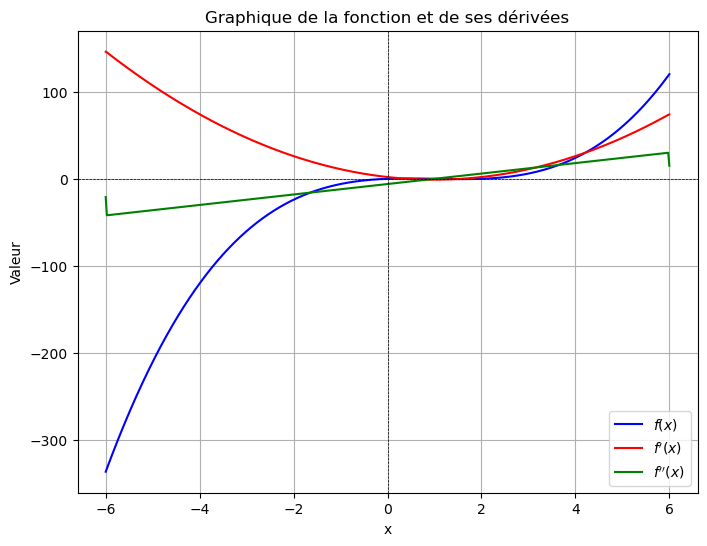

In [26]:
# Domaine d'évaluation
x = np.linspace(-6, 6, 1000)
y = f(x)

# Dérivée première
dy_dx = np.gradient(y, x)
# Dérivée seconde
d2y_dx2 = np.gradient(dy_dx, x)

# Affichage des dérivées sur le même graphique
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label=r'$f(x)$', color='blue')
ax.plot(x, dy_dx, label=r"$f'(x)$", color='red')
ax.plot(x, d2y_dx2, label=r"$f''(x)$", color='green')
ax.axhline(0, color='black', lw=0.5, ls='--')
ax.axvline(0, color='black', lw=0.5, ls='--')
ax.set_title('Graphique de la fonction et de ses dérivées')
ax.set_xlabel('x')
ax.set_ylabel('Valeur')
ax.grid()
ax.legend()

**Remarque** : Lorsqu’on utilise des méthodes numériques comme `np.gradient` pour calculer des dérivées à partir de valeurs discrètes, des erreurs importantes peuvent apparaître aux extrémités du domaine, en effet, la méthode utilise des approximations différentes (dites "à une face"), qui sont moins précises que celles utilisées au centre. Ces imprécisions sont particulièrement visibles lorsqu’on calcule la dérivée seconde, car la moindre erreur de la dérivée première est alors amplifiée, comme on peut le voir sur le graphique ci-dessus.
Pour éviter d’interpréter à tort ces résultats, il est d’usage d’ignorer (ou de ne pas afficher) les valeurs de dérivées près des bords.

### Avec Sympy

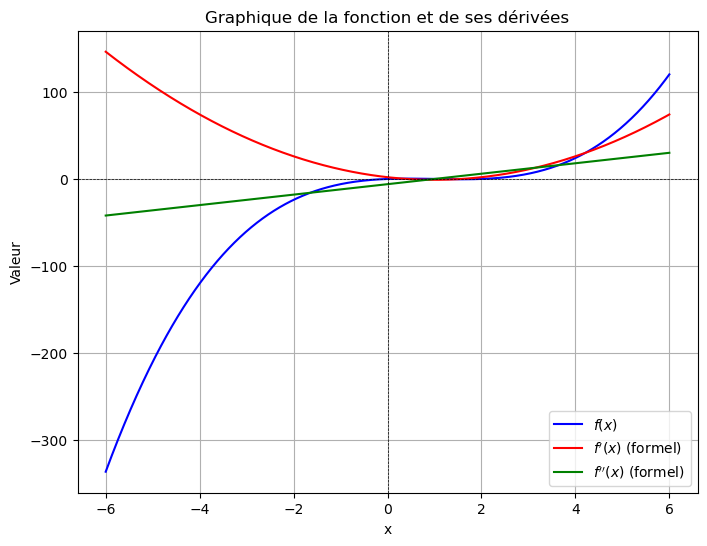

In [27]:
x_sym = sp.symbols('x')
f_sym = x_sym**3 - 3*x_sym**2 + 2*x_sym

# Calcul formel de la dérivée
f_deriv_sym = sp.diff(f_sym, x_sym)
f_deriv_func = sp.lambdify(x_sym, f_deriv_sym, modules='numpy')  # vectorisation
# Calcul formel de la dérivée seconde
f_deriv2_sym = sp.diff(f_deriv_sym, x_sym)
f_deriv2_func = sp.lambdify(x_sym, f_deriv2_sym, modules='numpy')  # vectorisation

# Affichage des dérivées sur un graphique
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label=r'$f(x)$', color='blue')
ax.plot(x, f_deriv_func(x), label=r"$f'(x)$ (formel)", color='red')
ax.plot(x, f_deriv2_func(x), label=r"$f''(x)$ (formel)", color='green')
ax.axhline(0, color='black', lw=0.5, ls='--')
ax.axvline(0, color='black', lw=0.5, ls='--')
ax.set_title('Graphique de la fonction et de ses dérivées')
ax.set_xlabel('x')
ax.set_ylabel('Valeur')
ax.grid()
ax.legend()
plt.show()

On voit que Sympy n'a pas d'erreur sur les bords comme avec Numpy, car comme on l'a vu précédemment, il ne fait pas d'approximation numérique, mais il utilise des formules exactes pour calculer les dérivées. Il est donc plus précis que Numpy pour ce genre de calculs.

# Détection de points d’inflexion via la dérivée seconde

Dans l'analyse mathématique, un point d'inflexion d'une courbe est un point où la courbe change de concavité. Autrement dit, c'est un point où la courbe passe de "concave vers le haut" à "concave vers le bas" ou vice-versa. Les points d'inflexion sont importants dans de nombreuses applications, notamment en physique, en économie et en Data Science

In [37]:
x = sp.symbols('x')
f = x**3 - 3*x**2 + 2*x

# Dérivée seconde et recherche des candidats
f2_prime = sp.diff(f, x, 2)
candidats = sp.solve(f2_prime, x)

# un point est candidat si la dérivée seconde s'annule

# Vérification du changement de concavité
points_inflexion = []
for c in candidats:
    # la méthode subs permet de substituer une valeur dans une expression
    # On vérifie le signe de la dérivée seconde à gauche et à droite du candidat
    gauche = f2_prime.subs(x, c - 0.01)
    droite = f2_prime.subs(x, c + 0.01)
    if sp.sign(gauche) != sp.sign(droite):
        points_inflexion.append(float(c))

# Affichage
print("Points d'inflexion (x):", points_inflexion)

# Evaluer y=f(x) aux points trouvés
y_inflect = [float(f.subs(x, xi)) for xi in points_inflexion]

# Préparation des données pour matplotlib
x_vals = np.linspace(-2, 4, 400)
f_lambd = sp.lambdify(x, f, 'numpy')
y_vals = f_lambd(x_vals)


Points d'inflexion (x): [1.0]


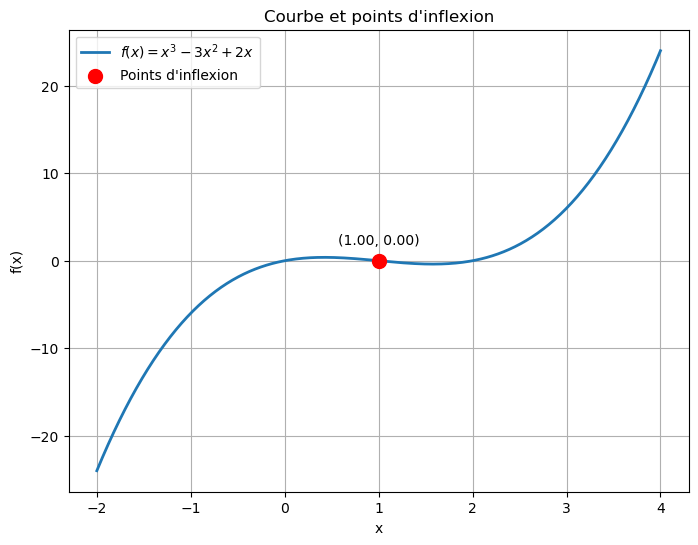

In [38]:
%matplotlib inline

plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, label='$f(x) = x^3 - 3x^2 + 2x$', lw=2)
plt.scatter(points_inflexion, y_inflect, color='red', zorder=5, s=100, label='Points d\'inflexion')
for xi, yi in zip(points_inflexion, y_inflect):
    plt.annotate(f'({xi:.2f}, {yi:.2f})', (xi, yi), textcoords="offset points", xytext=(0,12), ha='center')

plt.title("Courbe et points d'inflexion")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
